In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("C:/Users/HP/OneDrive - Universidad Tecnológica de Panamá/MAESTRIA EN ANALITICA DE DATOS/MODELOS PREDICTIVOS/proyecto gastos medicos - cambios del profesor/PROCESO DE CAMBIOS/Raiz de Y/Dataset_Codificado_raizy.csv")
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,region,raiz_y
0,19,27.900,0,16884.92400,False,True,False,False,True,Southwest,129.942002
1,18,33.770,1,1725.55230,True,False,False,True,False,Southeast,41.539768
2,28,33.000,3,4449.46200,True,False,False,True,False,Southeast,66.704288
3,33,22.705,0,21984.47061,True,False,True,False,False,Northwest,148.271611
4,32,28.880,0,3866.85520,True,False,True,False,False,Northwest,62.184043


In [4]:
# ANÁLISIS ESTADÍSTICO DE RAIZ_Y
# Estadísticos descriptivos
raiz_y_stats = df[['raiz_y']].describe().T
print("Estadísticos descriptivos para la variable 'Raiz_Y':")
display(raiz_y_stats)

# Moda
raiz_y_mode = pd.DataFrame(df[['raiz_y']].mode().iloc[0]).T
print("\nModa de la variable 'Raiz_Y':")
display(raiz_y_mode)

# Rango Intercuartílico (IQR)
raiz_y_iqr = pd.DataFrame(df[['raiz_y']].quantile(0.75) - df[['raiz_y']].quantile(0.25)).T
raiz_y_iqr.index = ['IQR']
print("\nRango Intercuartílico (IQR) de la variable 'Raiz_Y':")
display(raiz_y_iqr)


Estadísticos descriptivos para la variable 'Raiz_Y':


,count,mean,std,min,25%,50%,75%,max
raiz_y,1337.0,104.88173,47.756152,33.494386,68.893715,96.882203,129.06478,252.528074



Moda de la variable 'Raiz_Y':


,raiz_y
0,33.494386



Rango Intercuartílico (IQR) de la variable 'Raiz_Y':


,raiz_y
IQR,60.171065


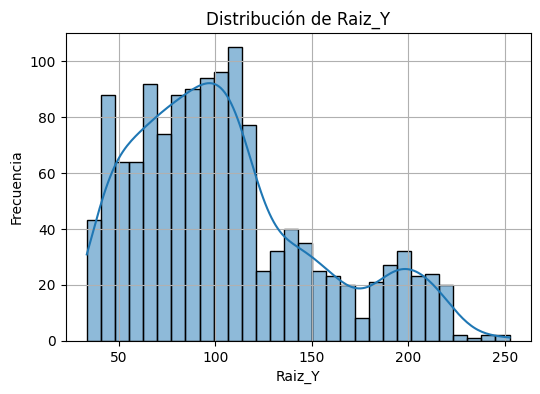

In [5]:
#### DISTRIBUCIÓN DE RAIZ_Y

col_num = ['raiz_y']

for col in col_num:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de Raiz_Y')
    plt.xlabel('Raiz_Y')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


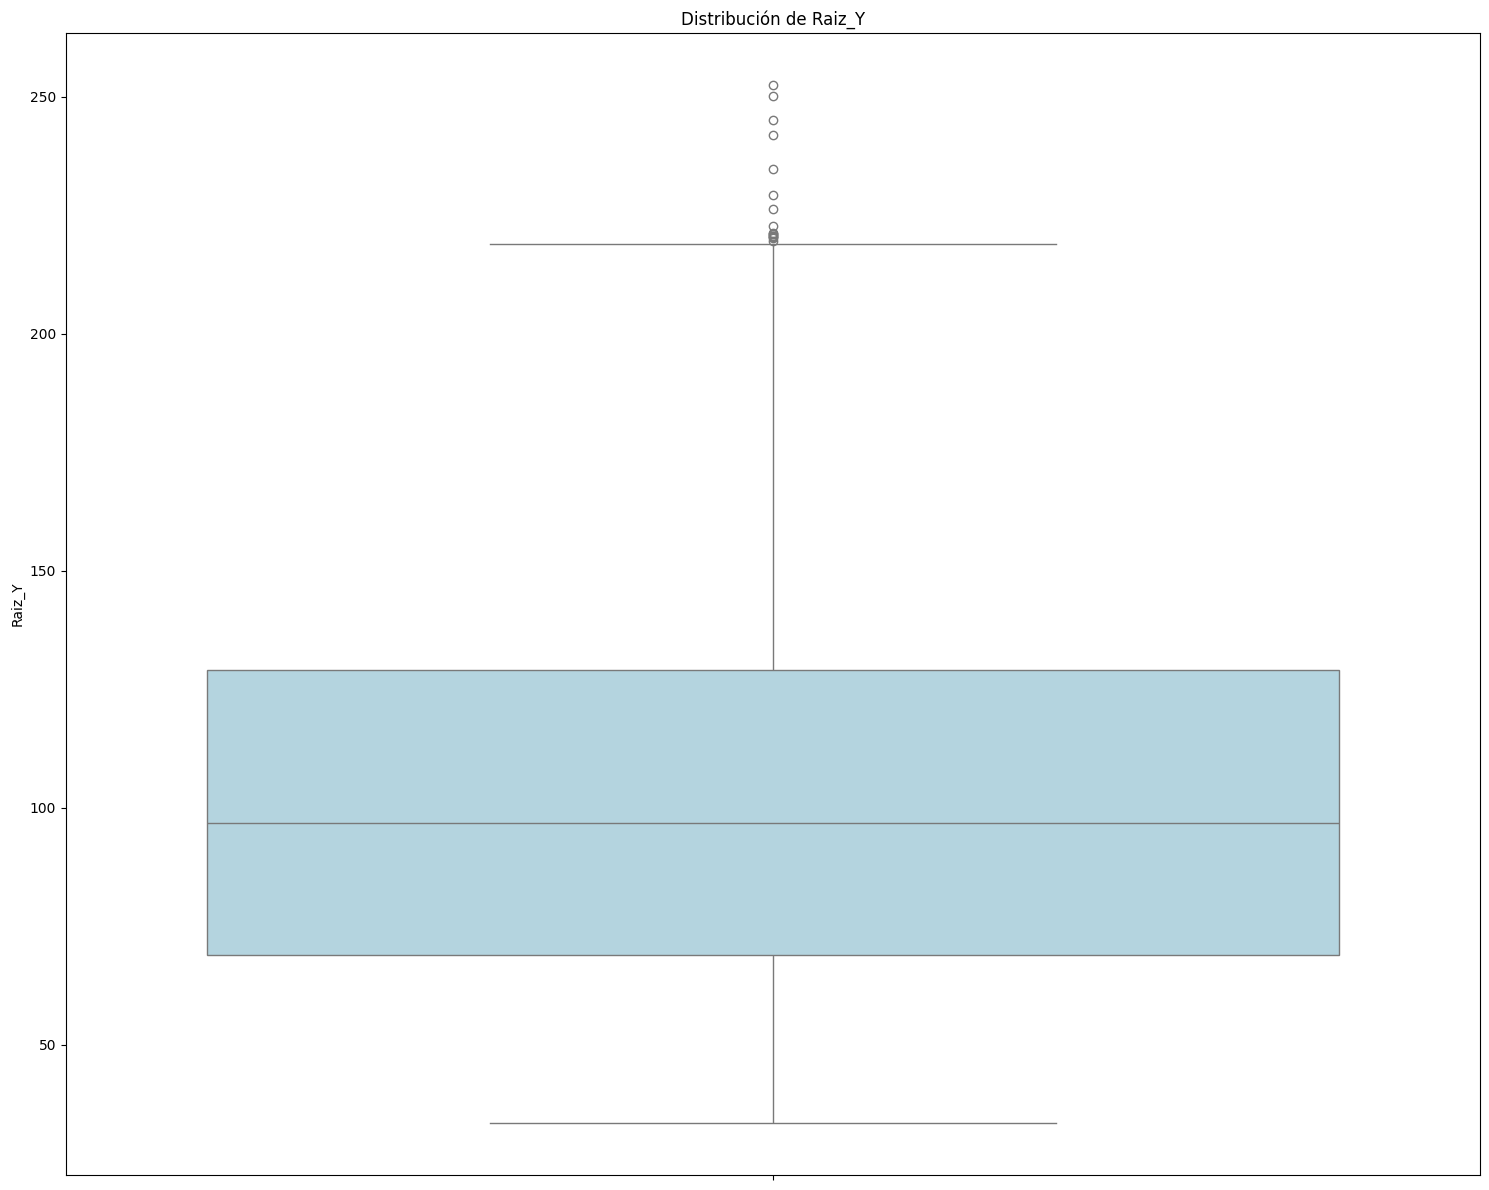

In [6]:
# BOXPLOT DE RAIZ_Y

plt.figure(figsize=(15, 12))

plt.subplot(1, 1, 1)
sns.boxplot(data=df, y='raiz_y', color='lightblue')
plt.title("Distribución de Raiz_Y")
plt.ylabel("Raiz_Y")

plt.tight_layout()
plt.show()


Coeficiente de Variación para Raiz_Y:
raiz_y    0.455
dtype: float64


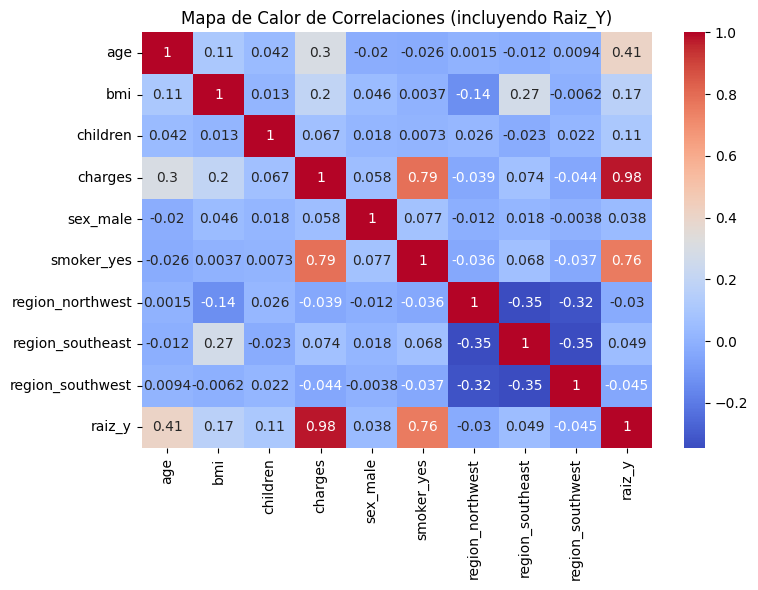

In [7]:
#### Análisis de Variabilidad (Coeficiente de Variación)

col_num = ['raiz_y']

cv = df[col_num].std() / df[col_num].mean()
print("Coeficiente de Variación para Raiz_Y:")
print(cv.round(3))

# MAPA DE CALOR DE CORRELACIONES

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones (incluyendo Raiz_Y)")
plt.tight_layout()
plt.show()


In [8]:
# Análisis de R² Individual (Regresión Simple con Raiz_Y)

# Realizamos regresión lineal de Raiz_Y con cada variable predictora por separado

for col in ['age', 'bmi', 'children']:
    X = df[[col]]
    y = df['raiz_y']
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    print(f'R² de Raiz_Y ~ {col}: {r2:.4f}')


R² de Raiz_Y ~ age: 0.1678
R² de Raiz_Y ~ bmi: 0.0282
R² de Raiz_Y ~ children: 0.0113


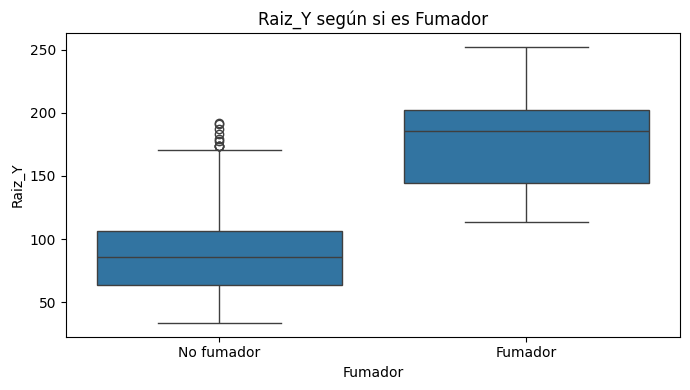

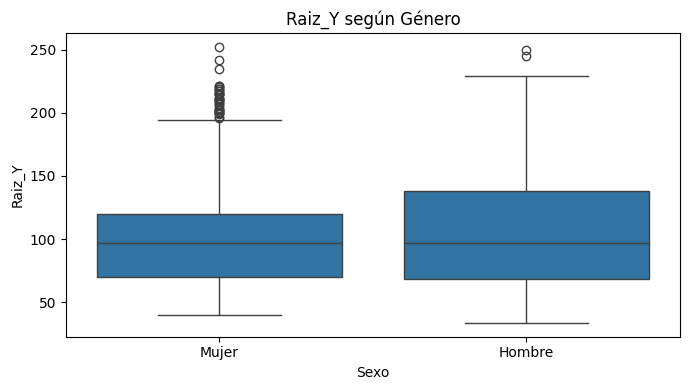

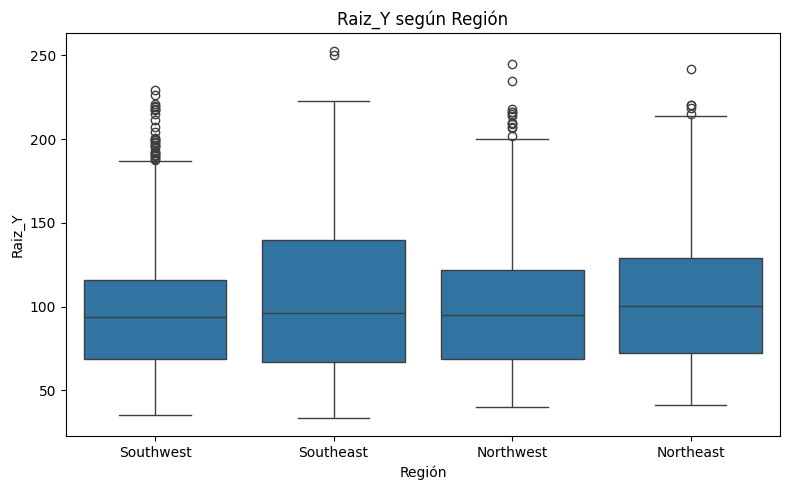

In [9]:
# BOXPLOTS

# Boxplot de Raiz_Y según si fuma o no
plt.figure(figsize=(7, 4))
sns.boxplot(x='smoker_yes', y='raiz_y', data=df)
plt.xticks([0, 1], ['No fumador', 'Fumador'])
plt.title("Raiz_Y según si es Fumador")
plt.xlabel("Fumador")
plt.ylabel("Raiz_Y")
plt.tight_layout()
plt.show()

# Boxplot de Raiz_Y según el género
plt.figure(figsize=(7, 4))
sns.boxplot(x='sex_male', y='raiz_y', data=df)
plt.xticks([0, 1], ['Mujer', 'Hombre'])
plt.title("Raiz_Y según Género")
plt.xlabel("Sexo")
plt.ylabel("Raiz_Y")
plt.tight_layout()
plt.show()

# Boxplot según la región
region_columns = [col for col in df.columns if col.startswith('region_')]
region_map = {
    'region_northwest': 'Northwest',
    'region_southeast': 'Southeast',
    'region_southwest': 'Southwest'
}

df['region'] = 'Northeast'
for col in region_map:
    df.loc[df[col] == 1, 'region'] = region_map[col]

plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='raiz_y', data=df)
plt.title("Raiz_Y según Región")
plt.xlabel("Región")
plt.ylabel("Raiz_Y")
plt.tight_layout()
plt.show()


In [10]:
# VALOR DE R² PARA CADA VARIABLE CODIFICADA

binary_cols = ['sex_male', 'smoker_yes', 
               'region_northwest', 'region_southeast', 'region_southwest']

print("Correlación con Raiz_Y:")
for col in binary_cols:
    corr = df[col].astype(int).corr(df['raiz_y'])  # Cambiado a raiz_y
    print(f"{col}: {corr:.4f}")

print("\nR² (Regresión lineal simple) con Raiz_Y:")
for col in binary_cols:
    X = df[[col]].astype(int)
    y = df['raiz_y']  # Cambiado a raiz_y
    model = LinearRegression().fit(X, y)
    r2 = model.score(X, y)
    print(f"{col}: R² = {r2:.4f}")


Correlación con Raiz_Y:
sex_male: 0.0380
smoker_yes: 0.7561
region_northwest: -0.0298
region_southeast: 0.0491
region_southwest: -0.0446

R² (Regresión lineal simple) con Raiz_Y:
sex_male: R² = 0.0014
smoker_yes: R² = 0.5716
region_northwest: R² = 0.0009
region_southeast: R² = 0.0024
region_southwest: R² = 0.0020


In [11]:
# SEPARAMOS NUESTRAS VARIABLES X Y Y

# Eliminamos las columnas region, charges y raiz_y para definir nuestra X
X = df.drop(['raiz_y', 'region', 'charges'], axis=1)
y = df['raiz_y']


In [16]:
#DIVIDIMOS NUESTRO CONJUNTO DE ENTRENAMIENTO Y PRUEBA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (1069, 8)
Tamaño del set de prueba: (268, 8)


In [31]:
# ENTRENAMIENTO DEL MODELO GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# PREDICCIONES
y_pred_gb = model_gb.predict(X_test)

# EVALUACIÓN DEL MODELO
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test, y_pred_gb) * 100

print("Evaluación del modelo Gradient Boosting:")
print(f"MAE: {mae_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²: {r2_gb:.4f}")
print(f"MAPE: {mape_gb:.2f}%")


Evaluación del modelo Gradient Boosting:
MAE: 9.98
MSE: 281.47
RMSE: 16.78
R²: 0.8942
MAPE: 10.93%


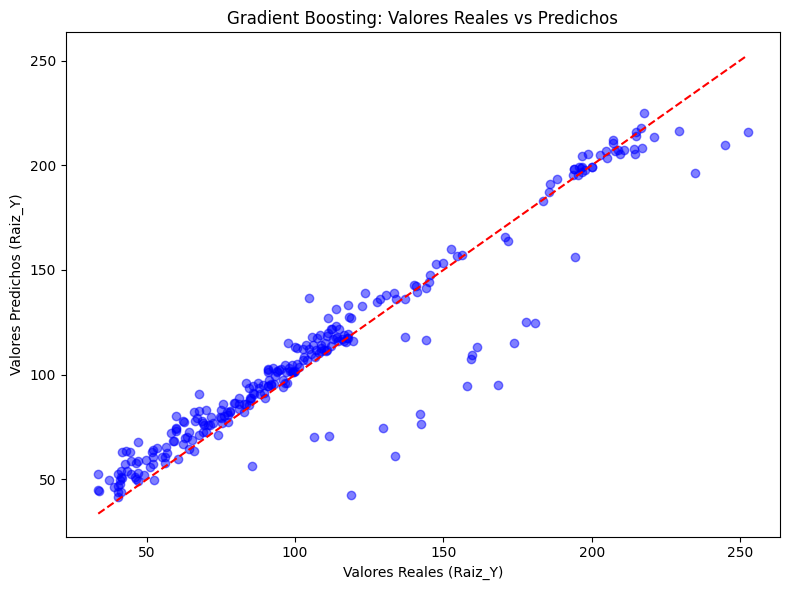

In [34]:
# VISUALIZACIÓN DE VALORES REALES VS VALORES DEL MODELO (PREDICCIÓN)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valores Reales (Raiz_Y)")
plt.ylabel("Valores Predichos (Raiz_Y)")
plt.title("Gradient Boosting: Valores Reales vs Predichos")
plt.tight_layout()
plt.savefig("PRECISION_GradientBoosting_Raiz_Y.png")
plt.show()


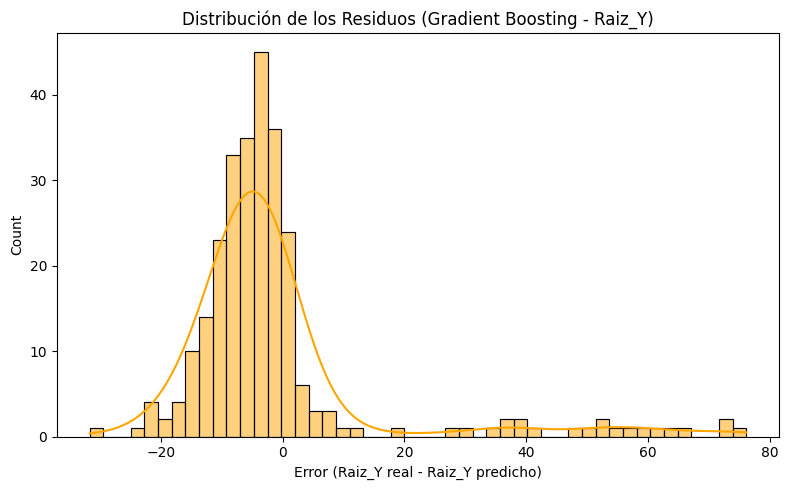

In [35]:
### GRÁFICO DE RESIDUOS
residuos_gb = y_test - y_pred_gb
plt.figure(figsize=(8, 5))
sns.histplot(residuos_gb, kde=True, color='orange')
plt.title("Distribución de los Residuos (Gradient Boosting - Raiz_Y)")
plt.xlabel("Error (Raiz_Y real - Raiz_Y predicho)")
plt.tight_layout()
plt.savefig("RESIDUOS_GradientBoosting_Raiz_Y.png")
plt.show()
